# Problema de Negócio

Na primeira etapa do nosso projeto, realizamos o estudo de análise de regressão para entender como as variáveis selecionandas impactavam na aceitação ou não do contrato de depósito à prazo. Com os resultados obtidos e os devidos derecionamentos e insights divulgados, agora, vamos para a próxima fase, que é entender quais são os grupos naturais que existem e, como eles, se comportam em termos de aceitação de contratos.

## 0.0 Pacotes e Bibliotecas

In [1]:
# Pacotes de Manipulação de Dados
import pandas as pd
import numpy as np
import math

# Pacotes de Visualização
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn

# Pacotes de Pré-Processamento
from sklearn import preprocessing, pipeline, compose

# Pacotes de Clusterização
from sklearn import cluster, mixture

# Métricas de Avaliação
from sklearn import metrics

### 0.1 Funções Auxiliares

In [2]:
# Validação dos Dados
def validacao(dataframe):
    print(' =================== Validação dos Dados ===================')
    print(f'Qtd. Linhas: {dataframe.shape[0]}; Qtd. Colunas: {dataframe.shape[1]}.\n') 

## 1.0 Carregamento dos Dados

In [3]:
# Carregamento dos Dados
df1 = pd.read_csv('../BaseDados/bank-full.csv', low_memory=False, delimiter=';');

# Validação dos Dados
validacao(df1)

# Amostra dos Dados
df1.sample(5)

 =================== Validação dos Dados ===================
Qtd. Linhas: 45211; Qtd. Colunas: 17.



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10966,35,entrepreneur,single,tertiary,no,-49,no,no,unknown,17,jun,668,8,-1,0,unknown,no
12936,31,management,single,tertiary,no,1598,yes,no,cellular,7,jul,36,33,-1,0,unknown,no
20025,41,management,single,secondary,no,800,no,no,cellular,8,aug,899,2,-1,0,unknown,no
38814,40,admin.,single,secondary,no,2040,yes,no,cellular,18,may,906,2,350,2,failure,yes
12365,32,blue-collar,divorced,unknown,no,291,yes,yes,unknown,27,jun,120,6,-1,0,unknown,no


### 1.1 Dicionário de Dados

Logo abaixo, temos o dicionário das variáveis.

| Nome da Variável | Descrição |
|------------------|-------------------|
|     age       |   Idade do Cliente| 
|     job       | 	Tipo do trabalho. Temos as seguintes categorias: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'.|
|    marital    |   Status Matrimonia. Categorias: 'divorced','married','single','unknown'. |
|   education   |   Nível educacional do cliente. Categorias: 'primary', 'secondary', 'tertiary' |
|    default    |   Essa variável nos diz se o cliente é inadimplente. Categorias: 'yes', 'no'. |
|    balance    |   Saldo médio anual do cliente na conta, cuja unidade é em euros. |
|    housing    |   Possui financiamento imobiliário? Categorias: 'yes', 'no'.|
|    loan       |   Possui empréstimo pessoal? Categorias: 'yes', 'no'. |
|    contact    |   Meio de contato utilizado para falar com o cliente. Categorias: 'celular', 'telephone'.|
|  day_of_week  |   Último Dia da semana em que o contato foi feito. |
|     month     |   Último mês de contato com o cliente. |
|   duration    |   Duração da ligação, em segundos, da última ligação. |
|   campaign    |   Número de contatos realizados com o cliente durante a campanha atual. |
|    pdays      |   Número de dias que se passaram desde o último contato com o cliente em uma campanha anterior. Se a variável -1, então o cliente não foi contatado. |
|   previous    |   Número de contatos realizados com o clientes antes dessa campanha. |
|   poutcome    |   Resultado da campanha anterior de marketing. |
|      y        |   Variável alvo para saber se o cliente assinou ou não termo de depósito. Categorias: 'yes':Aceitou; 'no': Não Aceitou |

## 2.0 Análise Exploratória dos Dados

In [4]:
# Cópia dos Dados
df2 = df1.copy()

# Validação
validacao(df2)

# Amostra
df2.sample(3)

 =================== Validação dos Dados ===================
Qtd. Linhas: 45211; Qtd. Colunas: 17.



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43033,48,unemployed,married,secondary,no,926,no,no,cellular,15,feb,382,4,185,6,success,yes
38731,24,blue-collar,single,secondary,no,1690,yes,yes,cellular,15,may,543,3,350,3,failure,no
22003,37,management,single,tertiary,no,198,no,no,cellular,20,aug,304,5,-1,0,unknown,no


### 2.1 Variável Alvo

Vamos analisar nossa variável alvo para entender como está a distribuição.

In [5]:
df2['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

Podemos observar um certo desbalancemento nos dados. Como estamos trabalhando com análise de grupos, não será necessário um balanceamento. Todavia, no momento do agrupamento, essa variável não será levada em conta.


### 2.2 Tipagem dos Dados

In [6]:
# Tipo dos dados
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 2.3 Análise Exploratória dos Dados

**Variáveis Numéricas**

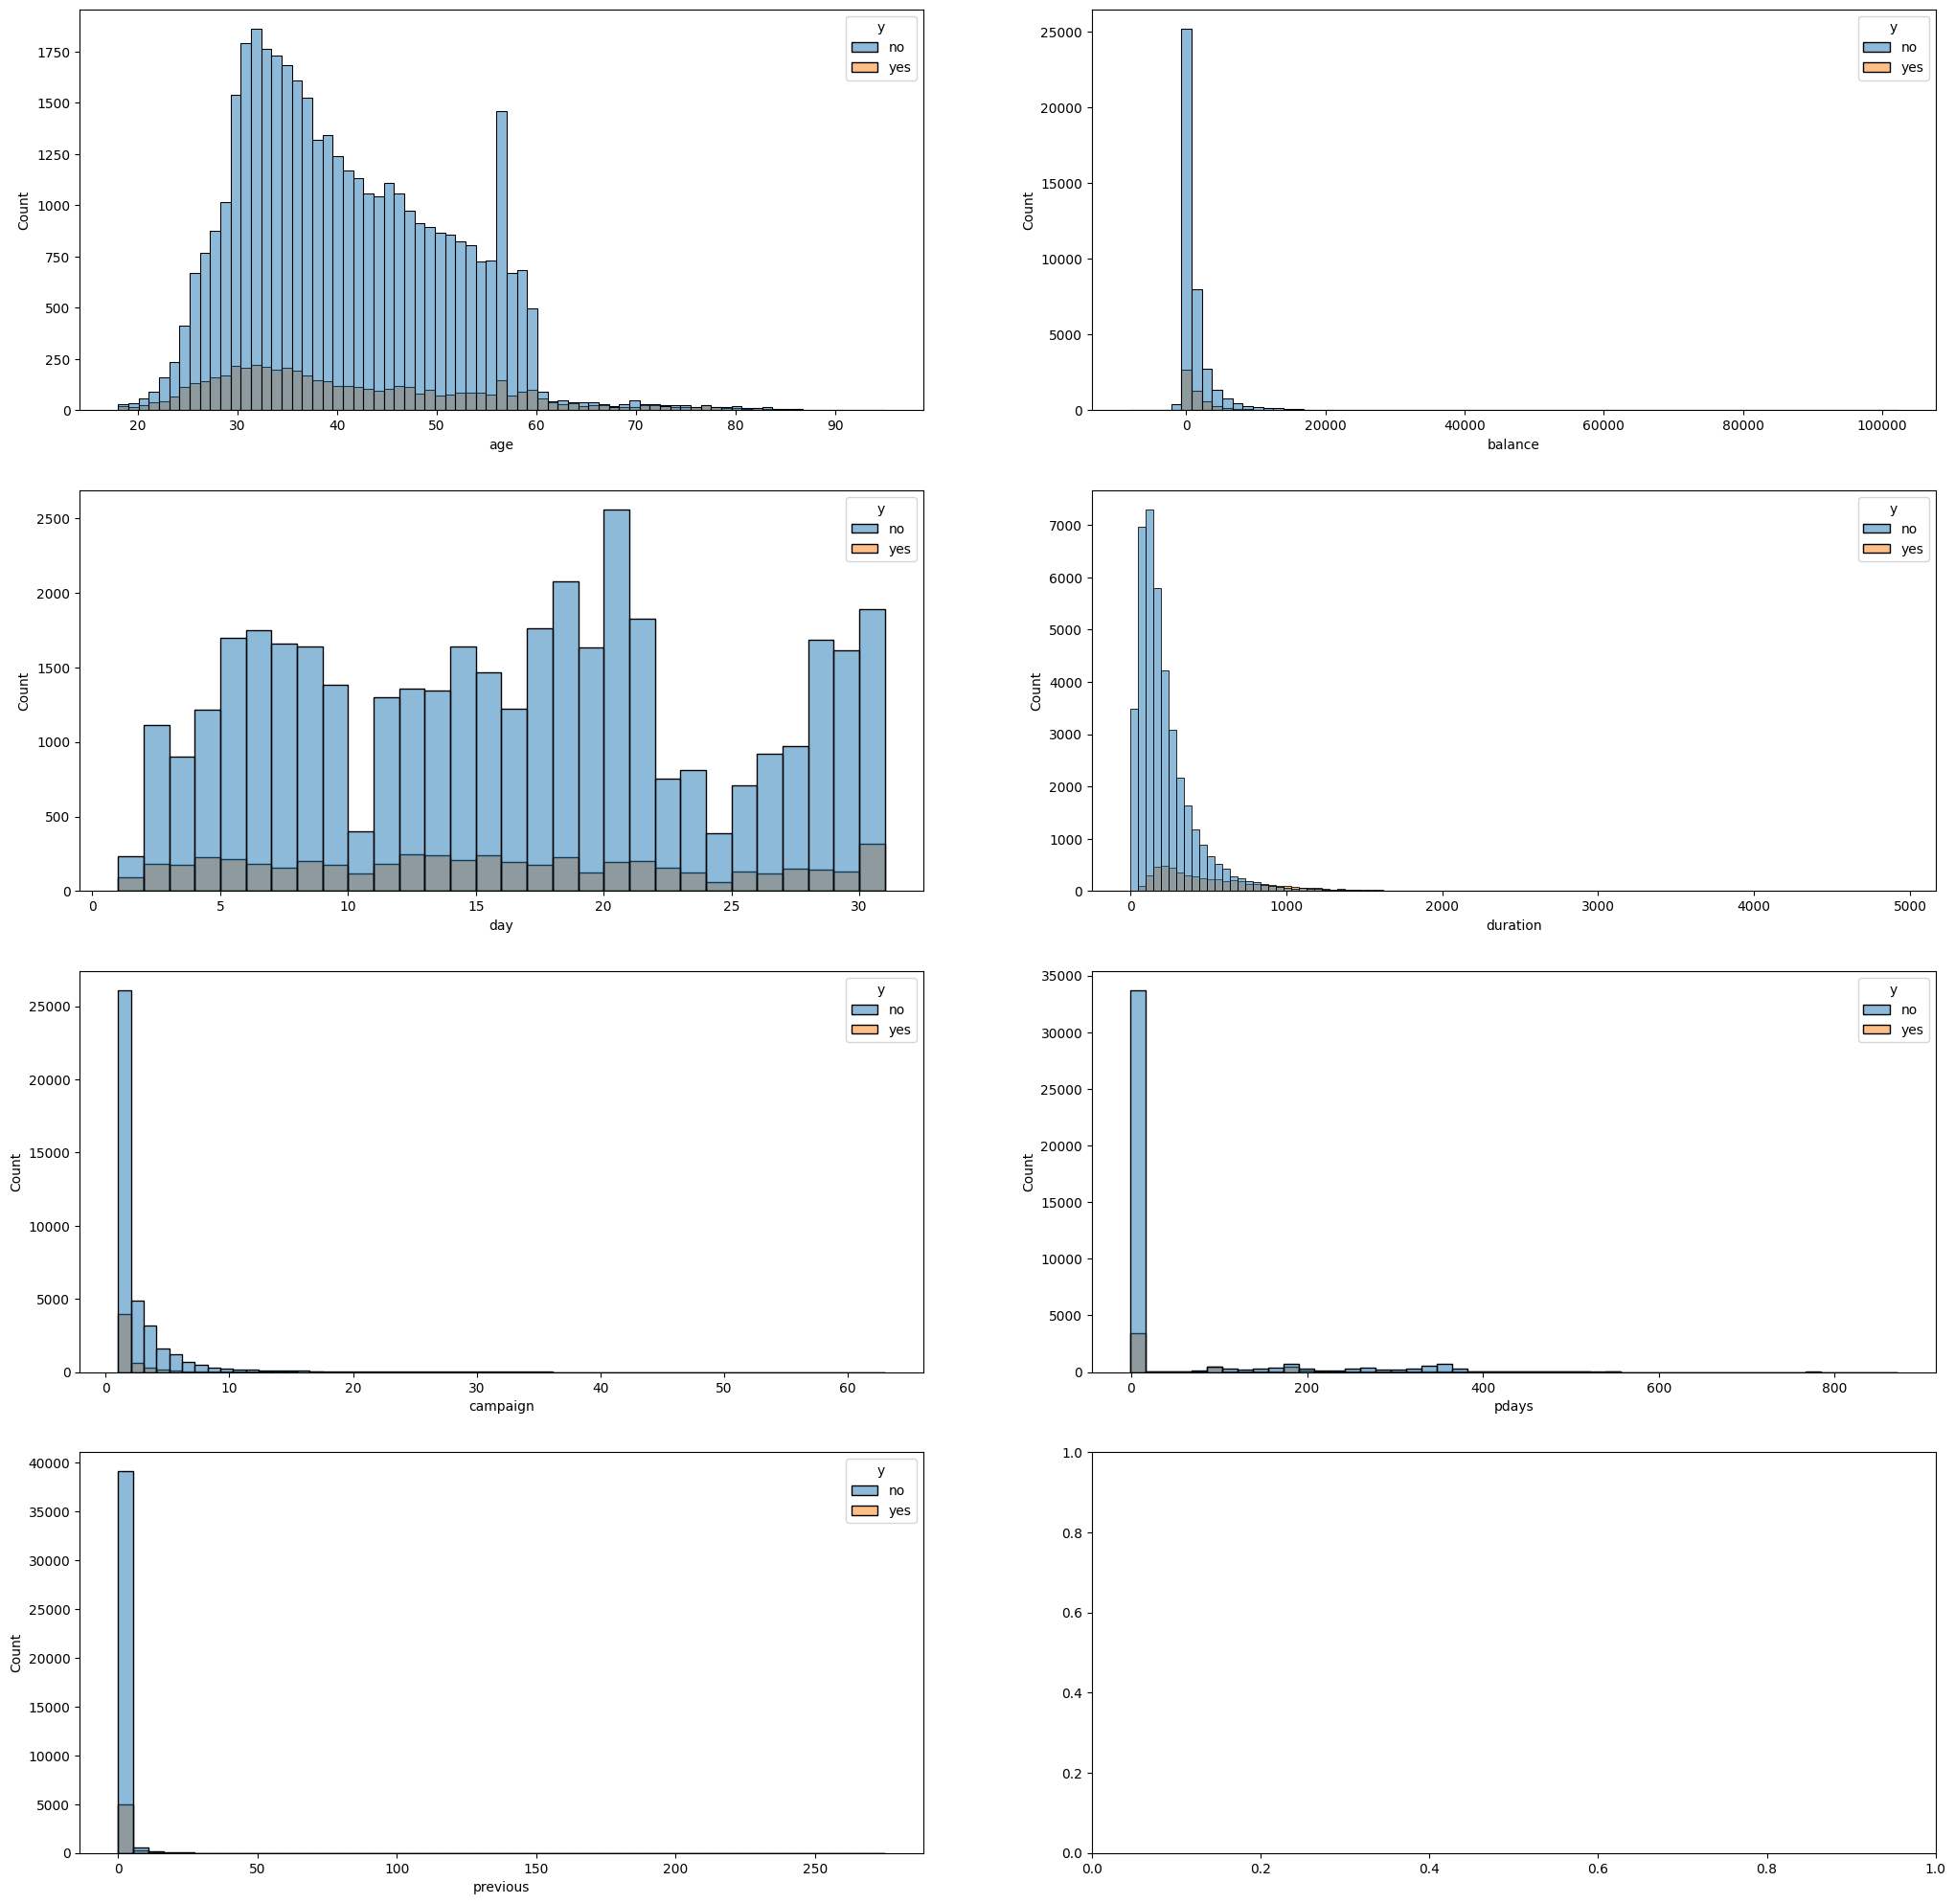

In [7]:
# Difinindo a figura
eda_varnum_fig, ax = plt.subplots(4, 2, figsize=(25,25));

# Distibuição da variável age
seaborn.histplot(data=df2, x='age', hue='y', bins=75, ax=ax[0][0]);
seaborn.histplot(data=df2, x='balance', hue='y', bins=75, ax=ax[0][1]);
seaborn.histplot(data=df2, x='day', hue='y', bins=30, ax=ax[1][0]);
seaborn.histplot(data=df2, x='duration', hue='y', bins=100, ax=ax[1][1]);
seaborn.histplot(data=df2, x='campaign', hue='y', bins=60, ax=ax[2][0]);
seaborn.histplot(data=df2, x='pdays', hue='y', bins=50, ax=ax[2][1]);
seaborn.histplot(data=df2, x='previous', hue='y', bins=50, ax=ax[3][0]);

**Variáveis Categóricas**

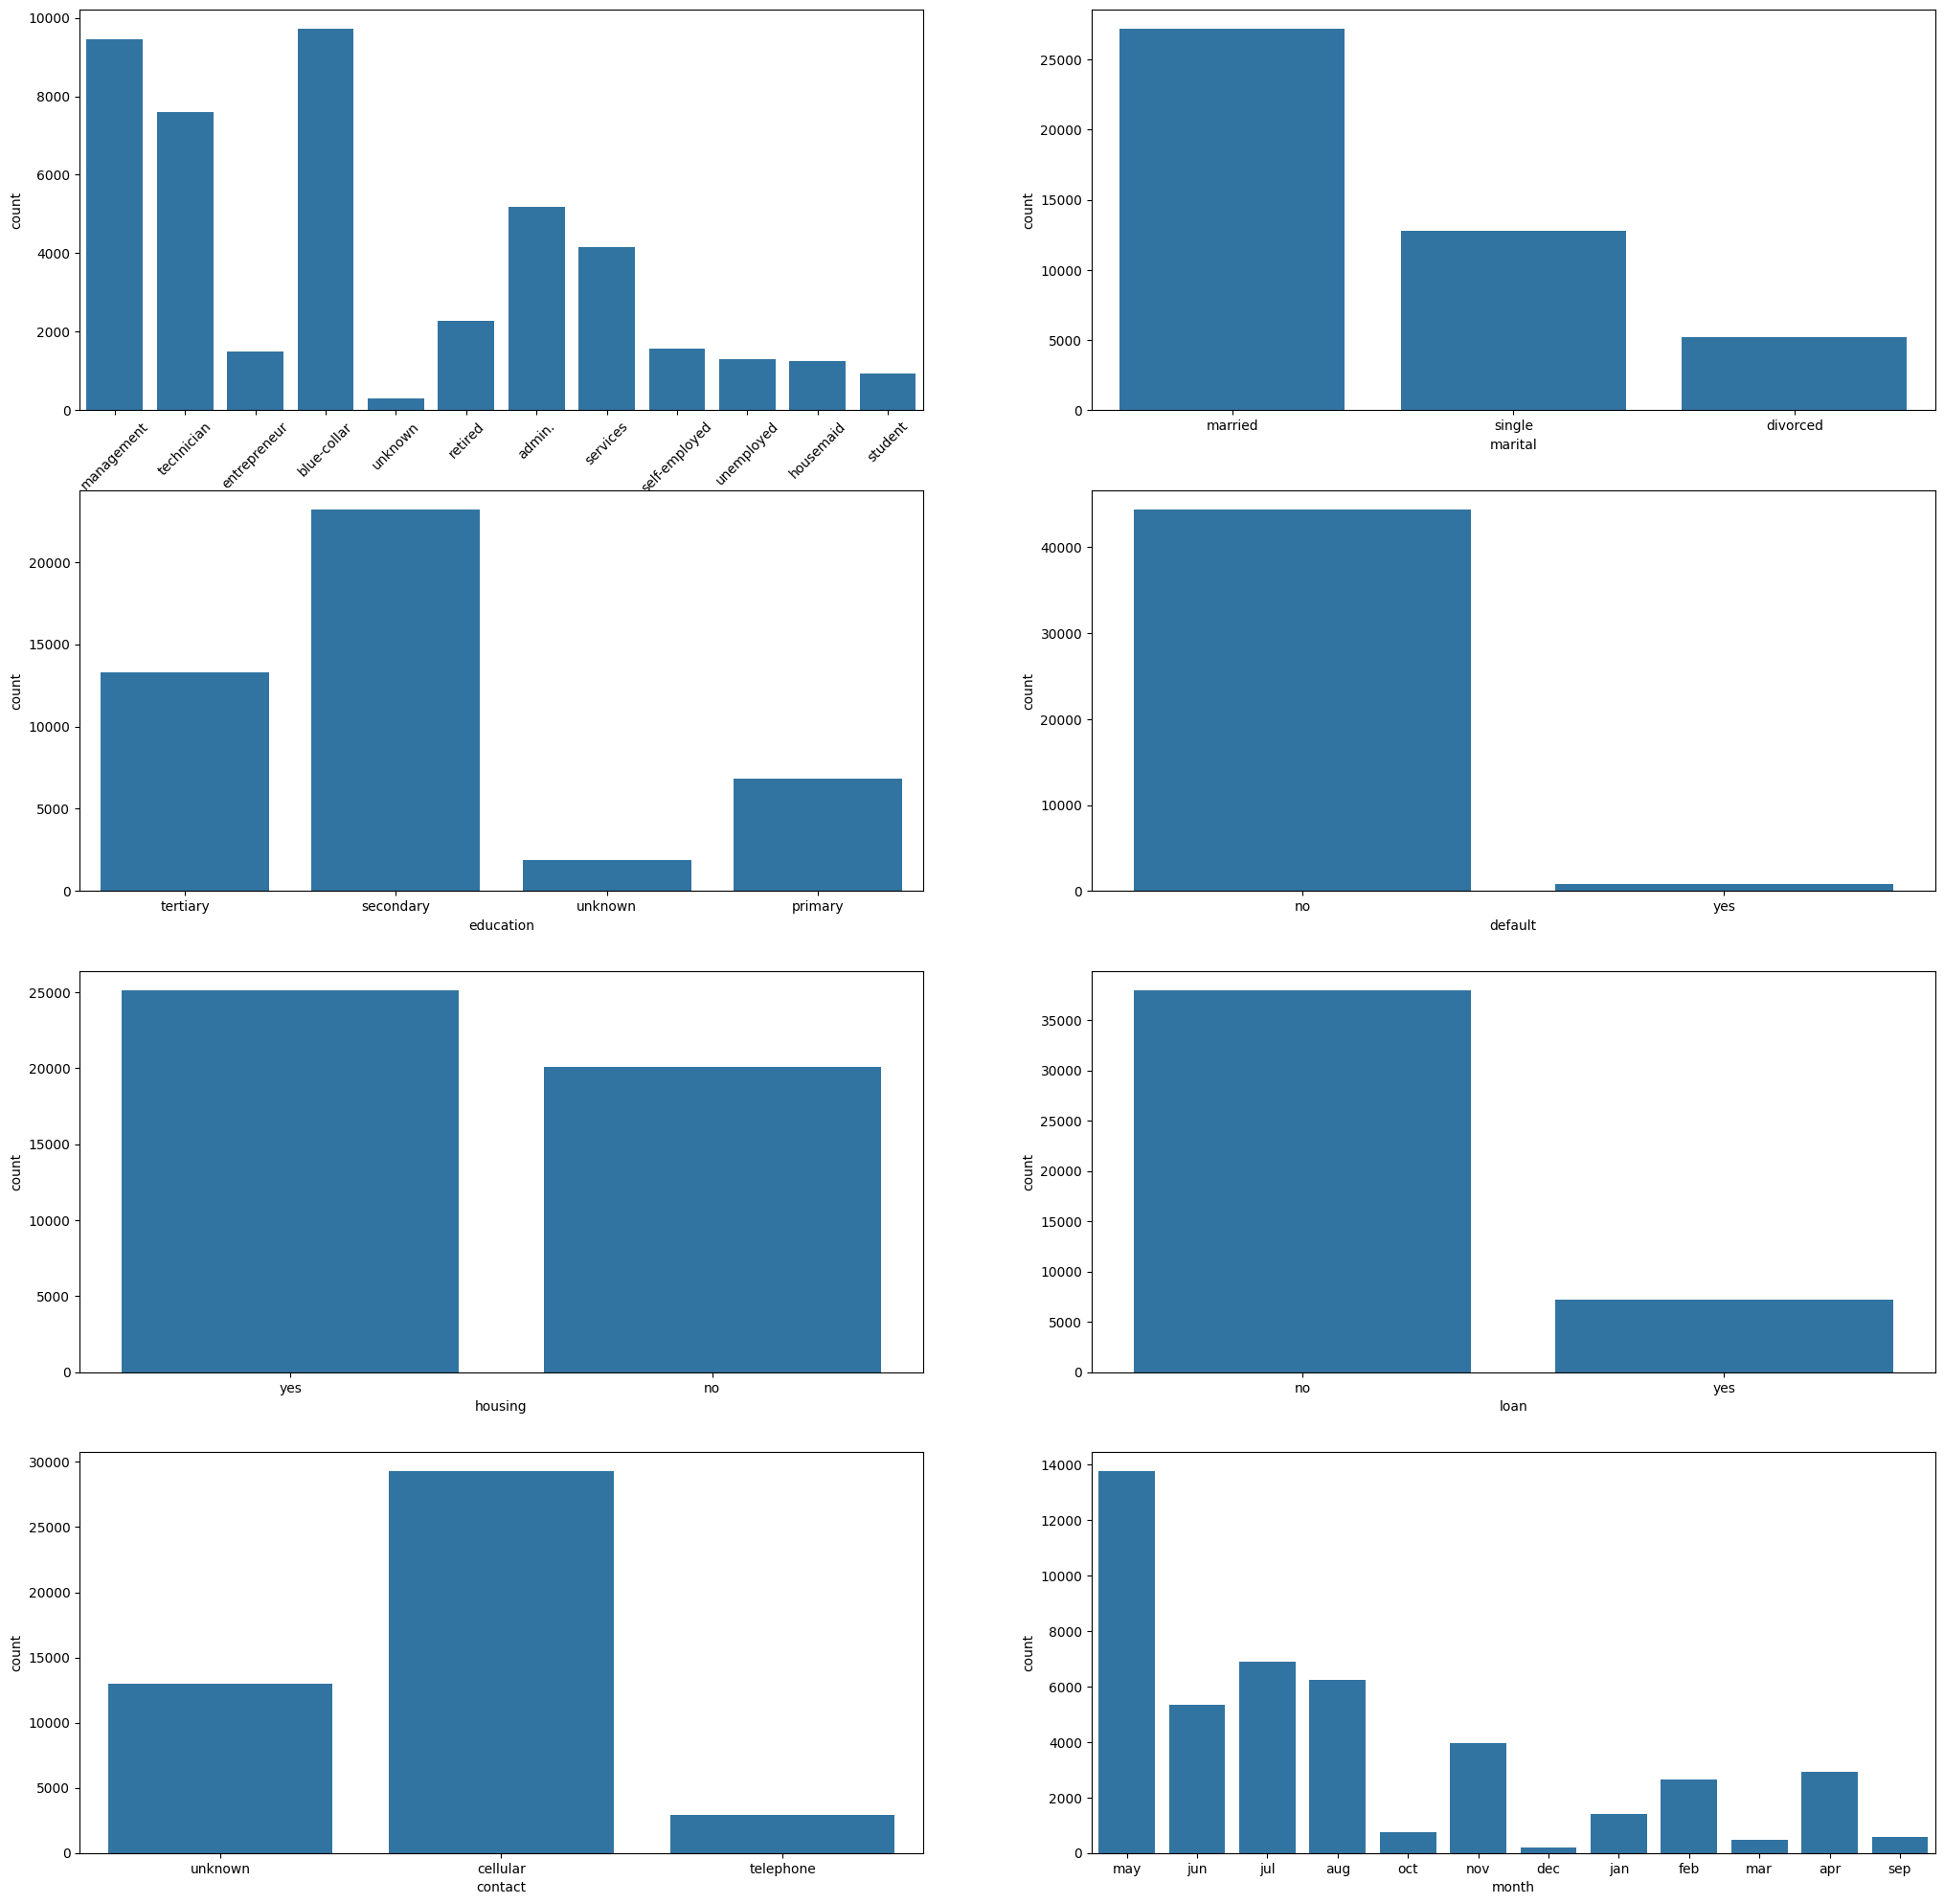

In [8]:
# Definindo a área de plotagem
fig_varcat_eda, bx = plt.subplots(4, 2, figsize=(25, 25));

# Gráficos
seaborn.countplot(data=df2, x='job', ax=bx[0][0]);
bx[0][0].tick_params(axis='x', rotation=45);

seaborn.countplot(data=df2, x='marital', ax=bx[0][1]);
seaborn.countplot(data=df2, x='education', ax=bx[1][0]);
seaborn.countplot(data=df2, x='default', ax=bx[1][1]);
seaborn.countplot(data=df2, x='housing', ax=bx[2][0]);
seaborn.countplot(data=df2, x='loan', ax=bx[2][1]);
seaborn.countplot(data=df2, x='contact', ax=bx[3][0]);
seaborn.countplot(data=df2, x='month', ax=bx[3][1]);

**Relatório Final**

* age: Na variável idade, possuímos um comportamento esperado. Os clientes estão bem concentrados entre as faixas de 30 a 60 anos, que é o período mais ativo, em termos financeiros, de uma pessoa. Logo, os dados estão consistentes.
* balance: Temos uma concentração de saldo médio em até 20.000. Totalmente esperado, pois são poucos clientes que terão muito dinheiro.
* day: inconclusivo
* duration: NO meio telefônico, é totalmente esperado muitas ligações com pouco tempo de duração e, poucas ligações com um longo tempo de duração. Comportamento esperado.
* campaing: Raciocício análogo a variável duration.
* pdays: Temos nessa base clientes que foram contatados a primeira vez, claramente, uma parte da base é prospecção. E a outra parte segue o raciocínio a variável duration.
* previous: idem variável duration.
* marital: Com essa podemos ver que os clientes são majoritariamente casados, seguidos de solteiros. 
* education: Os clientes do banco possuem, em sua maioria, o segundo grau completo. Isso também está dentro do esperado.
* default: Não há nem o que dizer nessa variável. Faz total sentido que os clientes de um banco sejam majoritariamente não-inadimplentes, caso contrário, o banco quebraria.
* housing: Aqui temos um comportamento interessante, da nossa lista, a maioria dos clientes possuem financiamentos imobiliários. Um dos principais motivos foi a desvalorização de imóveis por conta da explosão da bolha imobiliária de 2008 e, o incentivo ao crédito imobiliário.
* loan: Poucos clientes possuem um empréstimo pessoal. Faz sentido, não são todos que vão tomar crédito.
* contact: A maioria dos contatos realizados são por celular, o que faz bastante sentido, pois é muito mais fácil encontrar o cliente no telefone pessoal do que em um telefone fixo.
* month: inconclusivo.

Resumidamente, temos um dataset consistente. Podemos seguir nossa análise.

### 2.3 Resumo Estatístico

**Variáveis Numéricas**

In [9]:
df2.select_dtypes(include=['int64', 'float64']).describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Variáveis Categóricas**

In [10]:
df2.select_dtypes(exclude=['int64', 'float64']).describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Ao analisar o nosso resumo estatístico, temos as seguintes conclusõe:
* A variável balance possui outliers, o que é esperado, pois em instituições bancárias, existem clientes que terão um saldo médio extremamente elevado.
* O comportamento da variável duration também é esperado. Lembrando que o dataset com o qual estamos trabalhando é de meados de 2008-2010, é esperado que tenhamos ligações mais duradouras, como por exemplo, de 1 hora e 30 minutos.
* Esse número, 63, que é um outliers na variável campaign, pode ser extremamente factível. Observe que, em uma época em que era necessário entrar em contato com o gerente e central para realizar transações, um  63 contatos em uma campanha, poderia ser feito tranquilamente por um cliente que é dono de uma empresa. O que torna mais factível isso que comentamos é o fato de a segunda maior volumetria de clientes ser empresários.
* Na variável pdays, é possível um cliente não ser contatado a mais de 875 dias. Às vezes é um cliente que está inativo.
* Um cliente bem relacionado pode tranquilamente poderia realizar 275 contatos antes da campanha. Novamente, coloquemos um cliente que é dono de uma empresa e que realiza muitas transações.  

Podemos observar que não foi notado nada atípico em nosso dataset. Vamos seguir com a análise exploratória dos dados para verificar a consistência dos dados.

**Tratativas Necessárias**

Da nossa análise exploratória, precisamos realizar algumas tratativas. 
1. Não temos a necessidade de tratar dados nulos.
2. Em nossa análise, os outliers que estão presentes nas variáveis contínuas são totalmente esperados. Logo, tratamento de remoção de outliers não é algo a ser considerado.
3. Como nosso objetivo aqui é realizar uma análise de cluster, de acordo com o perfil do cliente, vamos eliminar as variáveis day e month.
4. Na variável pdays, vamos realizar uma engenharia de atributos para detectar os clientes que são novos ou não, isto é, vamos categorizar essa variável.

## 3.0 Tratamento dos Dados

In [11]:
# Cópia dos Dados
df3 = df2.copy()

# Validação dos Dados
validacao(df3)

# Amostra dos Dados
df3.sample(5)

 =================== Validação dos Dados ===================
Qtd. Linhas: 45211; Qtd. Colunas: 17.



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41528,34,management,married,tertiary,no,158,no,no,cellular,9,sep,278,2,132,4,failure,yes
10978,39,self-employed,married,secondary,no,1317,no,no,unknown,17,jun,42,4,-1,0,unknown,no
30445,34,management,divorced,tertiary,no,0,no,no,cellular,5,feb,108,4,175,3,failure,no
30869,34,admin.,single,secondary,no,1,yes,no,cellular,9,feb,185,7,280,1,other,no
28970,37,services,single,secondary,no,21,yes,no,cellular,2,feb,96,1,271,2,other,no


### 3.1 Eliminando as Colunas Desnecessárias

In [12]:
# Eliminando as colunas desnecessárias
df3 = df3.drop(columns=['day', 'month'], axis=1).copy()

# Validação
validacao(df3)

# Amostra dos Dados
df3.sample(3)

 =================== Validação dos Dados ===================
Qtd. Linhas: 45211; Qtd. Colunas: 15.



,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
35905,39,blue-collar,married,primary,no,1433,yes,no,cellular,182,2,366,1,other,no
25061,47,unemployed,married,secondary,yes,0,no,no,cellular,81,2,-1,0,unknown,no
30963,49,unemployed,single,tertiary,no,631,no,no,cellular,140,6,12,1,other,no


In [13]:
df3['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [14]:
# Tratamento da Variável Job
df3['job'] = np.where(df3['job'] == 'unknown', 'unknown_job', df3['job'])

# Tratamento da Variável Education
df3['education'] = np.where(df3['job'] == 'unknown', 'unknown_education', df3['education'])

# Tratamento da Variável Contact
df3['contact'] = np.where(df3['contact'] == 'unknown', 'unknown_contact', df3['contact'])

# Tratamento da Variável poutcome
df3['poutcome'] = np.where(df3['poutcome'] == 'unknown', 'unknown_outcome', df3['poutcome'])

# Renomeando a coluna de variável de aceitação de contrato
df3 = df3.rename(columns={'y':'accepted_contract'}).copy()

# Validação dos Dados
validacao(df3)

# Amostra dos Dados
df3.sample(10)

 =================== Validação dos Dados ===================
Qtd. Linhas: 45211; Qtd. Colunas: 15.



,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,accepted_contract
26482,49,self-employed,married,tertiary,no,2143,no,no,cellular,226,3,-1,0,unknown_outcome,no
2186,27,services,single,secondary,no,118,yes,yes,unknown_contact,53,1,-1,0,unknown_outcome,no
26854,46,blue-collar,married,primary,no,6150,yes,no,cellular,157,2,-1,0,unknown_outcome,no
6354,27,services,single,secondary,no,1043,yes,no,unknown_contact,376,2,-1,0,unknown_outcome,no
36213,41,blue-collar,married,secondary,no,1219,yes,no,cellular,628,1,-1,0,unknown_outcome,no
19984,38,technician,single,tertiary,no,523,no,no,cellular,388,1,-1,0,unknown_outcome,no
19939,48,admin.,married,secondary,no,811,no,yes,cellular,149,2,-1,0,unknown_outcome,no
8600,49,self-employed,married,secondary,no,0,yes,no,unknown_contact,51,9,-1,0,unknown_outcome,no
12879,50,admin.,single,secondary,no,-79,no,yes,cellular,70,1,-1,0,unknown_outcome,no
41653,53,admin.,married,secondary,no,109,no,no,telephone,431,1,120,1,success,no


## 4.0 Engenharia de Atributos

Nessa etapa, vamos realizar ajustes na variável pdays.

In [15]:
# Cópia dos Dados
df4 = df3.copy()

# Validação dos Dados
validacao(df4)

# Amostra dos Dados
df4.sample(5)

 =================== Validação dos Dados ===================
Qtd. Linhas: 45211; Qtd. Colunas: 15.



,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,accepted_contract
7916,31,unemployed,divorced,primary,no,0,yes,no,unknown_contact,745,12,-1,0,unknown_outcome,yes
31705,53,blue-collar,married,primary,no,53,yes,no,cellular,208,1,140,1,failure,no
25647,39,technician,divorced,secondary,no,688,yes,yes,cellular,214,1,-1,0,unknown_outcome,no
16602,41,technician,married,secondary,no,0,yes,no,cellular,168,1,-1,0,unknown_outcome,no
14407,35,admin.,divorced,secondary,no,0,no,yes,cellular,245,2,-1,0,unknown_outcome,no


In [16]:
# Engenharia da variável pdays
df4['pdays'] = np.where(df4['pdays'] == -1, 'First Contact',
                np.where(np.trunc(df4['pdays']/30) == 1, 'one month without contact',
                np.where(np.trunc(df4['pdays']/30) == 2, 'two months without contact',
                np.where(np.trunc(df4['pdays']/30) == 3, 'three months without contact',
                np.where((3 < np.trunc(df4['pdays']/30)) & (np.trunc(df4['pdays']/30) <= 6), '+3 months without contact',
                np.where((6 < np.trunc(df4['pdays']/30)) & (np.trunc(df4['pdays']/30) <= 12), '+6 months without contact',
                         '+1 year without contact'))))))

In [17]:
df4.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,accepted_contract
22678,58,blue-collar,married,unknown,no,9,no,no,cellular,50,23,First Contact,0,unknown_outcome,no
20233,49,self-employed,married,tertiary,no,23917,no,no,cellular,51,4,First Contact,0,unknown_outcome,no
34961,33,management,single,secondary,no,802,yes,no,cellular,47,1,First Contact,0,unknown_outcome,no
9607,45,admin.,divorced,secondary,no,246,no,no,unknown_contact,119,1,First Contact,0,unknown_outcome,no
43656,47,blue-collar,married,tertiary,no,3745,no,no,cellular,113,1,+3 months without contact,1,failure,no


## 5.0 Pré-Processamento dos Dados

Vamos realizar o encoding das variáveis. Como queremos encontrar grupos naturais do nosso conjunto de dados, a partir das caracterísitcas, vamos eliminar a variável que nos diz se o cliente aceitou ou não o termo de contrato.

In [18]:
# Cópia dos Dados
df5 = df4.copy()

# Validação dos Dados
validacao(df5)

# Amostra dos Dados
df5 = df5.drop(columns=['accepted_contract'], axis=1)

df5.sample(5)


 =================== Validação dos Dados ===================
Qtd. Linhas: 45211; Qtd. Colunas: 15.



,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
11950,47,management,divorced,tertiary,no,2515,no,no,unknown_contact,40,3,First Contact,0,unknown_outcome
27303,43,management,married,tertiary,no,13851,yes,no,cellular,259,1,First Contact,0,unknown_outcome
9932,43,services,divorced,secondary,no,5571,no,no,unknown_contact,149,1,First Contact,0,unknown_outcome
1200,32,blue-collar,single,primary,no,611,yes,no,unknown_contact,541,3,First Contact,0,unknown_outcome
11852,40,blue-collar,married,primary,no,0,no,no,unknown_contact,618,4,First Contact,0,unknown_outcome


**Variáveis Categóricas**

In [19]:
transform_variable = compose.ColumnTransformer(
                                               [
                                                ('job', preprocessing.OneHotEncoder(handle_unknown='ignore', dtype='int64', sparse_output=False), ['job']),
                                                ('marital', preprocessing.OneHotEncoder(handle_unknown='ignore', dtype='int64', sparse_output=False), ['marital']),
                                                ('education', preprocessing.OrdinalEncoder(categories=[['unknown', 'primary', 'secondary','tertiary']], dtype='int64', handle_unknown='use_encoded_value', unknown_value=-1), ['education']),
                                                ('default', preprocessing.OrdinalEncoder(categories=[['no', 'yes']], dtype='int64', handle_unknown='use_encoded_value', unknown_value=-1), ['default']),
                                                ('housing', preprocessing.OrdinalEncoder(categories=[['no', 'yes']], dtype='int64', handle_unknown='use_encoded_value', unknown_value=-1), ['housing']),
                                                ('loan', preprocessing.OrdinalEncoder(categories=[['no', 'yes']], dtype='int64', handle_unknown='use_encoded_value', unknown_value=-1), ['loan']),
                                                ('contact', preprocessing.OneHotEncoder(handle_unknown='ignore', dtype='int64', sparse_output=False), ['contact']),
                                                ('pdays', preprocessing.OrdinalEncoder(categories=[['First Contact', 'one month without contact', 'two months without contact', 'three months without contact', 
                                                                                                   '+3 months without contact', '+6 months without contact', '+1 year without contact']], dtype='int64'), ['pdays']),
                                                ('poutcome', preprocessing.OneHotEncoder(handle_unknown='ignore', dtype='int64'), ['poutcome']),
                                                ('variaveis_numericas', preprocessing.StandardScaler(), ['age', 'balance', 'duration', 'campaign', 'previous'])                                                                                                   
                                              ]
                                             )

# Parametros
transform_variable

,transformers,"[('job', ...), ('marital', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


**Construção do Pipeline de Pré-Processamento**

In [20]:
# Construção do Pipeline de pré-processamento
pre_processamento = pipeline.Pipeline([('EncodeVariaveisCategoricas', transform_variable)])

# validação dos Parâmetros
pre_processamento

,steps,"[('EncodeVariaveisCategoricas', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('job', ...), ('marital', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## 6.0 Clusterização dos Grupos

In [21]:
# Cópia dos dados
X = df5.copy()

Com o pipeline de pré-processamento criado, vamos agora, para a criação dos pipelines de clusterização. Utilizaremos vários métodos, claramente, com o objetivo de resolver um problema de negócio, mas, para além disso, para adquirir mais bagagem técnica para resolver problemas de negócios.

### 6.1 KMeans

In [22]:
# Declarando lista vazia
lista_labels_kmeans = dict()
kmeans_silhouette_score = dict()
kmeans_davies_bouldin_score = dict()

for k in range(2, 8):

    # Definindo o Pipeline
    pipeline_kmeans = pipeline.Pipeline([
                                     ('PreProcessamento', pre_processamento),
                                     ('Kmeans', cluster.KMeans(n_clusters=k, init='k-means++' ,algorithm='lloyd', max_iter=500, random_state=42))
                                    ])
    
    # Fit Predict
    lista_labels_kmeans[k] = pipeline_kmeans.fit_predict(X).tolist()

    # Armazenando a silhoutte Score
    kmeans_silhouette_score[k] = metrics.silhouette_score(pipeline_kmeans['PreProcessamento'].transform(X), lista_labels_kmeans[k])

    # Armazenando davies_boulding score
    kmeans_davies_bouldin_score[k] = metrics.davies_bouldin_score(pipeline_kmeans['PreProcessamento'].transform(X), lista_labels_kmeans[k])

**Gráfico Silhouette Score**

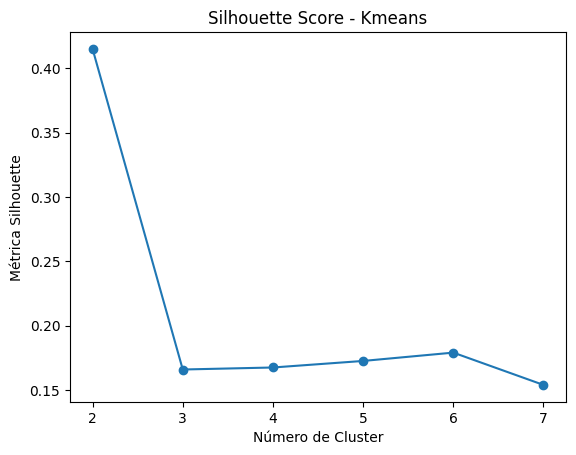

In [23]:
plt.figure()
plt.plot(list(kmeans_silhouette_score.keys()), list(kmeans_silhouette_score.values()), marker='o')
plt.xlabel("Número de Cluster")
plt.ylabel('Métrica Silhouette')
plt.title('Silhouette Score - Kmeans')

# eixo x apenas inteiros
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

# Amostra do Gráfico
plt.show()

**Gráfico de Davies Bouldin**

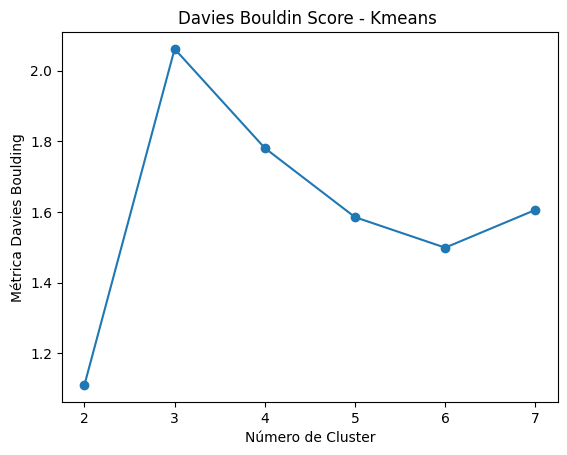

In [24]:
plt.figure()
plt.plot(list(kmeans_davies_bouldin_score.keys()), list(kmeans_davies_bouldin_score.values()), marker='o')
plt.xlabel("Número de Cluster")
plt.ylabel('Métrica Davies Boulding')
plt.title('Davies Bouldin Score - Kmeans ')

# eixo x apenas inteiros
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.show()

### 6.2 Gaussian Mixture

In [25]:
# Declarando lista vazia
lista_labels_gaussian = dict()
gaussian_silhouette_score = dict()
gaussian_davies_bouldin_score = dict()

for k in range(2, 8):

    # Definindo o Pipeline
    pipeline_gaussian = pipeline.Pipeline([
                                            ('PreProcessamento', pre_processamento),
                                            ('Gaussian', mixture.GaussianMixture(n_components=k, random_state=42))
                                           ])
    
    # Fit Predict
    lista_labels_gaussian[k] = pipeline_gaussian.fit_predict(X).tolist() 

    # Armazenando a silhoutte Score
    gaussian_silhouette_score[k] = metrics.silhouette_score(pipeline_gaussian['PreProcessamento'].transform(X), lista_labels_gaussian[k])

    # Armazenando davies_boulding score
    gaussian_davies_bouldin_score[k] = metrics.davies_bouldin_score(pipeline_gaussian['PreProcessamento'].transform(X), lista_labels_gaussian[k])

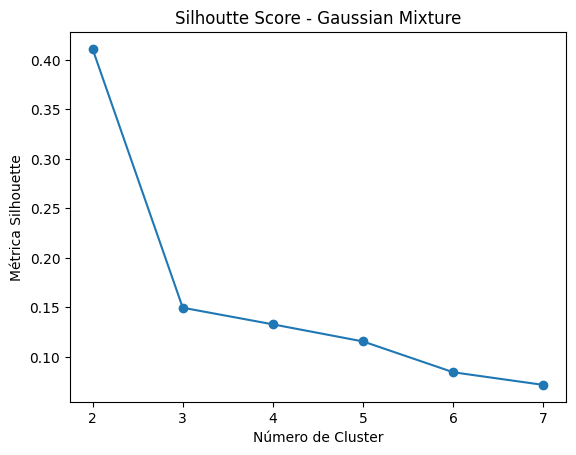

In [26]:
plt.figure()
plt.plot(list(gaussian_silhouette_score.keys()), list(gaussian_silhouette_score.values()), marker='o')
plt.xlabel("Número de Cluster")
plt.ylabel('Métrica Silhouette')
plt.title('Silhoutte Score - Gaussian Mixture')

# eixo x apenas inteiros
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.show()

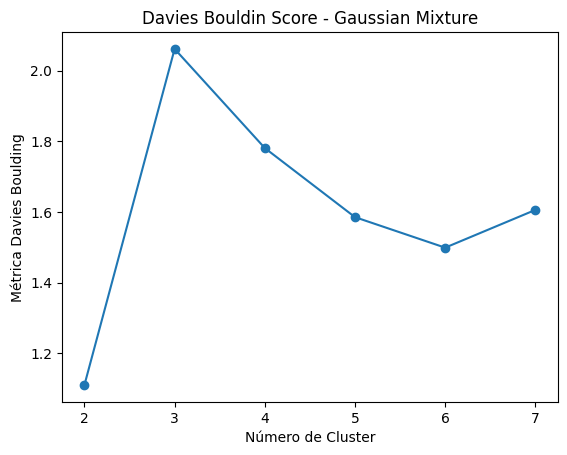

In [27]:
plt.figure()
plt.plot(list(kmeans_davies_bouldin_score.keys()), list(kmeans_davies_bouldin_score.values()), marker='o')
plt.xlabel("Número de Cluster")
plt.ylabel('Métrica Davies Boulding')
plt.title('Davies Bouldin Score - Gaussian Mixture')

# eixo x apenas inteiros
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.show()

**Relatório Final**

Analisando os dois modelos aplicados, podemos observar que a quantidade de clusters a ser escolhido é 3. Vamos apenas verificar, com um pouco de mais de detalhes, o score dos dois modelos para a quantidade de cluster k=3.

In [28]:
print(f'============================== Métricas de Avaliação Kmean para 3 clusters ============================== ')
print(f'Silhoutte Score: {kmeans_silhouette_score[3]}')
print(f'Davies-Bouldin: {kmeans_davies_bouldin_score[3]}')
print(f'============================== Métricas de Avaliação Gaussian para 3 clusters ============================== ')
print(f'Silhoutte Score: {gaussian_silhouette_score[3]}')
print(f'Davies-Bouldin: {gaussian_davies_bouldin_score[3]}')

============================== Métricas de Avaliação Kmean para 3 clusters ============================== 
Silhoutte Score: 0.16585725936747422
Davies-Bouldin: 2.061604913378298
============================== Métricas de Avaliação Gaussian para 3 clusters ============================== 
Silhoutte Score: 0.1497295385282612
Davies-Bouldin: 3.0966462027884014


Dada as métricas, vamos então utilizar a clusterização realizada pelo Gaussian Mixture

## 7.0 Clusterização

In [29]:
# Treino do modelo
pipeline_gaussian = pipeline.Pipeline([('PreProcessamento', pre_processamento),('Gaussian', mixture.GaussianMixture(n_components=3, random_state=42))])

# Obtenção dos Rótulos
rotulos = pipeline_gaussian.fit_predict(X)

In [30]:
# Implementação dos rótulos
df5['clusters'] = rotulos

# Volumetria de Clusters
print('Quantidade de Registros: {}'.format(df5.shape[0]))
print('\nPercentual Representativo:')
df5['clusters'].value_counts()/df5.shape[0]

Quantidade de Registros: 45211

Percentual Representativo:


clusters
0    0.680454
1    0.182633
2    0.136914
Name: count, dtype: float64

## 8.0 Análise de Clusters

In [31]:
# Inserindo a Variável Alvo
df5['accepted_term'] = df1['y']

### 8.1 Análise de Perfil - Cluster 0

In [109]:
# Obtendo o grupo do cluster 0
cluster_0 = df5[df5['clusters'] == 0]

#### **age**

In [82]:
# Estatística da Idade
cluster_0.age.describe()

count    30764.000000
mean        39.313223
std          9.221146
min         18.000000
25%         32.000000
50%         38.000000
75%         46.000000
max         81.000000
Name: age, dtype: float64

Conclusões: Nesse agrupamento, os clientes possuem idade média de 39 anos, com uma variação entre 32 e 46 anos.

#### **job**

In [89]:
pd.DataFrame(np.round((cluster_0['job'].value_counts()/cluster_0.shape[0])*100, 2)).reset_index()

,job,count
0,blue-collar,24.77
1,management,23.36
2,technician,19.44
3,admin.,12.50
4,services,10.61
5,self-employed,3.95
6,unemployed,3.26
7,student,2.12


O cliente, no geral, possui o emprego de colarinho azul. Todavia, quando analisamos as profissões que ocupam nosso agrupamento, temos, que os três grupos mais representativos são colarinho azul, empresários/gestores e techinician.

#### **marital**

In [90]:
pd.DataFrame(np.round((cluster_0['marital'].value_counts()/cluster_0.shape[0])*100, 2)).reset_index()

,marital,count
0,married,58.34
1,single,30.39
2,divorced,11.27


Conclusões: Nesse agrupamento, os clientes são majoritariamente casados.

#### **education**

In [91]:
pd.DataFrame(np.round((cluster_0['education'].value_counts()/cluster_0.shape[0])*100, 2)).reset_index()

,education,count
0,secondary,53.42
1,tertiary,29.65
2,primary,13.20
3,unknown,3.73


Nesse agrupamento, os clientes, majoritariamente, possuem nível educacional secundário.

#### **default**

In [92]:
pd.DataFrame(np.round((cluster_0['default'].value_counts()/cluster_0.shape[0])*100, 2)).reset_index()

,default,count
0,no,97.93
1,yes,2.07


Nesse agrupamento os clientes não são inadimplentes.

#### **Balance**

In [94]:
cluster_0['balance'].describe()

count    30764.000000
mean      1143.219315
std       2117.269787
min      -8019.000000
25%         51.000000
50%        396.000000
75%       1282.250000
max      24025.000000
Name: balance, dtype: float64

O saldo médio em conta dos clientes que estão nesse agrupamento é de 1143.21. Podendo variar de 51 a 1282.

#### **Housing**

In [95]:
pd.DataFrame(np.round((cluster_0['housing'].value_counts()/cluster_0.shape[0])*100, 2)).reset_index()

,housing,count
0,yes,57.55
1,no,42.45


Quando olhamos para a variável housing temos quase que um equilíbrio, sendo assim, não existe nada majoritário para definir o característica do cliente nesse cluster.

#### **Loan**

In [96]:
pd.DataFrame(np.round((cluster_0['loan'].value_counts()/cluster_0.shape[0])*100, 2)).reset_index()

,loan,count
0,no,83.44
1,yes,16.56


#### **Contact**

In [97]:
pd.DataFrame(np.round((cluster_0['contact'].value_counts()/cluster_0.shape[0])*100, 2)).reset_index()

,contact,count
0,cellular,62.33
1,unknown_contact,37.44
2,telephone,0.23


Os clientes foram contatados, majoritariamente por celular.


#### **Duration**

In [98]:
cluster_0['duration'].describe()

count    30764.000000
mean       259.701339
std        260.866007
min          0.000000
25%        103.000000
50%        179.000000
75%        320.000000
max       3881.000000
Name: duration, dtype: float64

O tempo de ligação dos clientes desse grupo duram, média, 259 segundos, podendo variar em 103 a 320 segundos.

#### **Campaign**

In [99]:
cluster_0['campaign'].describe()

count    30764.000000
mean         2.886101
std          3.259282
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         46.000000
Name: campaign, dtype: float64

Os clientes desse grupo tiveram em média, 3 contatos durante a campanha.

#### **pdays**

In [102]:
cluster_0['pdays'].value_counts()

pdays
First Contact    30764
Name: count, dtype: int64

Os clientes desse grupos são clientes que nunca foram contatados.

#### **Previous**

In [106]:
cluster_0['previous'].describe()

count    30764.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: previous, dtype: float64

#### **Poutcome**

In [110]:
cluster_0['poutcome'].value_counts()

poutcome
unknown_outcome    30764
Name: count, dtype: int64

**Relatório Final**

Esse agrupamento, chamaremos prospects, pois todos são clientes que foram/serão contatados pela primeira vez. O perfil do cliente que está nesse grupo é alguém que possui 39 anos e, geralmente, possui emprego de colarinho azul ou empresário/gestor, casado e possui o segundo nível educacional. Em termos financeiros, não possui inadimplência, possui um saldo médio de 1.142,17 e sem empréstimo pessoal. Em relação a campanha e contatos, é um cliente que é contatado por celular, sendo que essas ligações realizadas pela instituição bancária, dura, em média, 259 segundos, isto é, 4 a 5 minutos.  

### 8.2 Análise de Perfil - Cluster 1

In [114]:
# Obtendo o grupo do cluster 1
cluster_1 = df5[df5['clusters'] == 1]

#### **age**

In [115]:
# Estatística da Idade
cluster_1.age.describe()

count    8257.000000
mean       40.953131
std        11.425180
min        18.000000
25%        33.000000
50%        38.000000
75%        48.000000
max        93.000000
Name: age, dtype: float64

Conclusões: Nesse agrupamento, os clientes possuem idade média de 40 anos, com uma variação entre 33 e 48 anos.

#### **job**

In [116]:
pd.DataFrame(np.round((cluster_1['job'].value_counts()/cluster_1.shape[0])*100, 2)).reset_index()

,job,count
0,management,22.11
1,blue-collar,19.58
2,technician,16.25
3,admin.,13.19
4,services,8.55
5,retired,5.91
6,student,3.45
7,self-employed,3.40
8,entrepreneur,2.72
9,unemployed,2.58


O cliente, no geral, possui o emprego de colarinho azul. Todavia, quando analisamos as profissões que ocupam nosso agrupamento, temos, que os três grupos mais representativos são colarinho azul, empresários/gestores e techinician.

#### **marital**

In [117]:
pd.DataFrame(np.round((cluster_1['marital'].value_counts()/cluster_1.shape[0])*100, 2)).reset_index()

,marital,count
0,married,57.47
1,single,31.26
2,divorced,11.28


Conclusões: Nesse agrupamento, os clientes são majoritariamente casados.

#### **education**

In [118]:
pd.DataFrame(np.round((cluster_1['education'].value_counts()/cluster_1.shape[0])*100, 2)).reset_index()

,education,count
0,secondary,51.52
1,tertiary,32.22
2,primary,12.35
3,unknown,3.91


Nesse agrupamento, os clientes, majoritariamente, possuem nível educacional secundário.

#### **default**

In [119]:
pd.DataFrame(np.round((cluster_1['default'].value_counts()/cluster_1.shape[0])*100, 2)).reset_index()

,default,count
0,no,99.31
1,yes,0.69


Nesse agrupamento os clientes não são inadimplentes.

#### **balance**

In [120]:
cluster_1['balance'].describe()

count     8257.000000
mean      1556.880102
std       3060.593186
min      -1884.000000
25%        168.000000
50%        602.000000
75%       1743.000000
max      81204.000000
Name: balance, dtype: float64

O saldo médio em conta dos clientes que estão nesse agrupamento é de 1556.88. Podendo variar de 168 a 1743.

#### **housing**

In [121]:
pd.DataFrame(np.round((cluster_1['housing'].value_counts()/cluster_1.shape[0])*100, 2)).reset_index()

,housing,count
0,yes,62.27
1,no,37.73


O cliente desse grupo possui, majoritariamentem financiamento imobiliário.

#### **loan**

In [122]:
pd.DataFrame(np.round((cluster_1['loan'].value_counts()/cluster_1.shape[0])*100, 2)).reset_index()

,loan,count
0,no,86.4
1,yes,13.6


O cliente desse grupo não possui empréstimo pessoal.

#### **contact**

In [123]:
pd.DataFrame(np.round((cluster_1['contact'].value_counts()/cluster_1.shape[0])*100, 2)).reset_index()

,contact,count
0,cellular,91.51
1,telephone,7.64
2,unknown_contact,0.85


Os clientes foram contatados, majoritariamente por celular.


#### **duration**

In [124]:
cluster_1['duration'].describe()

count    8257.000000
mean      260.118687
std       235.208105
min         1.000000
25%       113.000000
50%       193.000000
75%       324.000000
max      2219.000000
Name: duration, dtype: float64

O tempo de ligação dos clientes desse grupo duram, média, 260 segundos, podendo variar em 113 a 324 segundos.

#### **campaign**

In [125]:
cluster_1['campaign'].describe()

count    8257.000000
mean        2.056195
std         1.561169
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        16.000000
Name: campaign, dtype: float64

Os clientes desse grupo tiveram em média, 2 contatos durante a campanha.

#### **pdays**

In [127]:
cluster_1['pdays'].value_counts()/cluster_1.shape[0]

pdays
+6 months without contact       0.431149
+3 months without contact       0.309434
three months without contact    0.147148
+1 year without contact         0.054499
two months without contact      0.045658
one month without contact       0.012111
Name: count, dtype: float64

Os clientes desse grupos, majoritariamente, estão a mais de 6 meses sem contato.

#### **previous**

In [128]:
cluster_1['previous'].describe()

count    8257.000000
mean        3.177546
std         4.560820
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       275.000000
Name: previous, dtype: float64

Antes da campanha, os clientes desse grupo foram contatados em média 3 vezes, podendo variar de 1 contato a 4 contatos.

#### **poutcome**

In [130]:
cluster_1['poutcome'].value_counts()/cluster_1.shape[0]

poutcome
failure            0.593557
other              0.222841
success            0.182996
unknown_outcome    0.000606
Name: count, dtype: float64

E, para esses clientes, majoritariamente, a última campanha falhou.

**Relatório Final**

Esse agrupamento, chamaremos de reengagéveis, pois são clientes que, em algum momento, já teve contato conosco. O perfil do cliente que está nesse grupo é alguém que possui 40 anos e, geralmente, possui emprego de colarinho azul ou empresário/gestor, casado e possui o segundo nível educacional. Em termos financeiros, não possui inadimplência, possui um saldo médio de 1.556,88, possui financiamento imobiliário e não tem empréstimo pessoal. Em relação a campanha e contatos, é um cliente que é contatado por celular, sendo que essas ligações realizadas pela instituição bancária, dura, em média, 260 segundos, isto é, 4 a 5 minutos. Para além disso, é um cliente que, em média, foi contatado 2 vezes durante a campanha. Para além disso, é um cliente que está a mais de 6 meses sem um contato e, antes dessa campanha, recebia em média 3 contatos e na última campanha realizada, tal campanha não foi efetiva para esse cliente, isto é, não gerou conversão

### 8.3 Análise de Perfil - Cluster 2

In [131]:
# Obtendo o grupo do cluster 1
cluster_2 = df5[df5['clusters'] == 2]

#### **age**

In [132]:
# Estatística da Idade
cluster_2.age.describe()

count    6190.000000
mean       48.979806
std        12.210840
min        21.000000
25%        39.000000
50%        50.000000
75%        58.000000
max        95.000000
Name: age, dtype: float64

Conclusões: Nesse agrupamento, os clientes possuem idade média de 49 anos, com uma variação entre 39 e 58 anos.

#### **job**

In [133]:
pd.DataFrame(np.round((cluster_2['job'].value_counts()/cluster_2.shape[0])*100, 2)).reset_index()

,job,count
0,retired,28.69
1,entrepreneur,20.39
2,housemaid,17.58
3,blue-collar,8.01
4,management,7.21
5,technician,4.46
6,unknown_job,4.12
7,admin.,3.83
8,services,2.96
9,unemployed,1.41


O cliente, no geral, é aposentado, empreendedor ou dona de casa.

#### **marital**

In [134]:
pd.DataFrame(np.round((cluster_2['marital'].value_counts()/cluster_2.shape[0])*100, 2)).reset_index()

,marital,count
0,married,73.02
1,single,13.89
2,divorced,13.09


Conclusões: Nesse agrupamento, os clientes são majoritariamente casados.

#### **education**

In [135]:
pd.DataFrame(np.round((cluster_2['education'].value_counts()/cluster_2.shape[0])*100, 2)).reset_index()

,education,count
0,secondary,40.61
1,primary,28.59
2,tertiary,24.52
3,unknown,6.27


Nesse agrupamento, os clientes, majoritariamente, possuem nível educacional secundário.

#### **default**

In [136]:
pd.DataFrame(np.round((cluster_2['default'].value_counts()/cluster_2.shape[0])*100, 2)).reset_index()

,default,count
0,no,98.03
1,yes,1.97


Nesse agrupamento os clientes não são inadimplentes.

#### **balance**

In [137]:
cluster_2['balance'].describe()

count      6190.000000
mean       2191.360905
std        5653.865101
min       -2082.000000
25%          82.000000
50%         533.000000
75%        1865.500000
max      102127.000000
Name: balance, dtype: float64

O saldo médio em conta dos clientes que estão nesse agrupamento é de 2191.36.

#### **housing**

In [138]:
pd.DataFrame(np.round((cluster_2['housing'].value_counts()/cluster_2.shape[0])*100, 2)).reset_index()

,housing,count
0,no,63.1
1,yes,36.9


O cliente desse grupo possui, majoritariamentem financiamento imobiliário.

#### **loan**

In [139]:
pd.DataFrame(np.round((cluster_2['loan'].value_counts()/cluster_2.shape[0])*100, 2)).reset_index()

,loan,count
0,no,83.44
1,yes,16.56


O cliente desse grupo não possui empréstimo pessoal.

#### **contact**

In [140]:
pd.DataFrame(np.round((cluster_2['contact'].value_counts()/cluster_2.shape[0])*100, 2)).reset_index()

,contact,count
0,cellular,41.26
1,telephone,35.61
2,unknown_contact,23.13


Os clientes foram contatados, tanto por celular quanto por telefone.


#### **duration**

In [141]:
cluster_2['duration'].describe()

count    6190.000000
mean      247.909370
std       268.866348
min         0.000000
25%        92.000000
50%       167.000000
75%       302.000000
max      4918.000000
Name: duration, dtype: float64

O tempo de ligação dos clientes desse grupo duram, média, 247 segundos, podendo variar em 92 a 302 segundos.

#### **campaign**

In [142]:
cluster_2['campaign'].describe()

count    6190.000000
mean        3.100162
std         3.633383
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        63.000000
Name: campaign, dtype: float64

Os clientes desse grupo tiveram em média, 3 contatos durante a campanha.

#### **pdays**

In [143]:
cluster_2['pdays'].value_counts()/cluster_2.shape[0]

pdays
First Contact    1.0
Name: count, dtype: float64

São clientes que tiveram seu primeiro contato.

#### **previous**

In [144]:
cluster_2['previous'].describe()

count    6190.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: previous, dtype: float64

Antes da campanha, os clientes desse grupo foram contatados em média 3 vezes, podendo variar de 1 contato a 4 contatos.

#### **poutcome**

In [145]:
cluster_2['poutcome'].value_counts()/cluster_2.shape[0]

poutcome
unknown_outcome    1.0
Name: count, dtype: float64

**Relatório Final**

Esse agrupamento, chamaremos de Prospects Maduros,. O perfil do cliente que está nesse grupo é alguém que possui 49 anos e, geralmente, são aposentados, empreendedores ou empregados domésticos e possui o segundo nível educacional. Em termos financeiros, não possui inadimplência e possuem um saldo médio de 2.191,00 sem financiamento imobiliário e sem empréstimo pessoal. Em relação a campanha e contatos, são clientes que são contatados tanto por celular quanto por telefone, sendo que essas ligações realizadas pela instituição bancária, dura, em média, 247 segundos, isto é, 4 a 5 minutos. Para além disso, é um cliente que, em média, foi contatado 3 vezes durante a campanha e, não teve nenhum contato anterior nas campanhas

## 9.0 Conclusão Final

Nossa conclusão final é que conseguimos obter três grupos do nosso conjunto de dados. Os grupos são:

**Prospects**

* O perfil médio desse grupo é composto por indivíduos de 39 anos, geralmente empregados em funções operacionais (colarinho azul) ou atuando como empresários e gestores, casados e com ensino médio completo.

* Do ponto de vista financeiro, esses clientes não apresentam inadimplência, possuem saldo médio de R$ 1.142,17 e não possuem empréstimos pessoais ativos.

* No que se refere à campanha e aos contatos realizados, observa-se que o principal canal de comunicação é o telefone celular, com ligações que duram, em média, 259 segundos — aproximadamente quatro a cinco minutos

**Prospects Sêniors**

* O perfil médio dos clientes desse grupo é de 49 anos, sendo majoritariamente aposentados, empreendedores ou empregados domésticos, com ensino médio completo.

* Do ponto de vista financeiro, esses clientes não apresentam inadimplência, possuem saldo médio de R$ 2.191,00, não possuem financiamento imobiliário nem empréstimo pessoal ativo.

* No que se refere à campanha e aos contatos realizados, são clientes abordados tanto por telefone fixo quanto por celular, com ligações que duram, em média, 247 segundos — aproximadamente quatro a cinco minutos. Além disso, observa-se que esses clientes foram contatados, em média, três vezes durante a campanha, sem nenhum histórico de contato anterior em campanhas passadas.

**Reengajáveis**

* O perfil médio desse grupo é composto por indivíduos de 40 anos, geralmente empregados em funções operacionais (colarinho azul) ou atuando como empresários e gestores, casados e com ensino médio completo.

* Do ponto de vista financeiro, esses clientes não apresentam inadimplência, possuem saldo médio de R$ 1.556,88, têm financiamento imobiliário ativo e não possuem empréstimo pessoal.

* No que se refere à campanha e aos contatos realizados, são clientes contatados principalmente por celular, com ligações que duram, em média, 260 segundos — aproximadamente quatro a cinco minutos. Além disso, observa-se que esses clientes foram contatados, em média, duas vezes durante a campanha atual. Estão há mais de seis meses sem contato anterior e, historicamente, recebiam cerca de três contatos em campanhas anteriores. Na última campanha, contudo, não houve conversão, indicando ineficiência na ação anterior.